In [586]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [587]:
# Loading data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [588]:
df.shape

(1252, 7)

In [589]:
# Filter for only cryptocurrencies that are currently trading
df = df.loc[df['IsTrading'] == True]
df.shape

(1144, 7)

In [590]:
# Drop isTrading column now since not relevant to model
df = df.drop('IsTrading', 1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [591]:
# Drop all rows that have any null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 6)

In [592]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [593]:
# Only keep currencies that have been mined
df = df.loc[df['TotalCoinsMined'] > 0]

In [594]:
# Drop more columns not relevant to model
df = df.drop(['Unnamed: 0', 'CoinName'], 1)

In [595]:
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [596]:
df.shape

(532, 4)

In [597]:
# Cast TotalCoinSupply to numeric before creating dummies
df["TotalCoinSupply"] = pd.to_numeric(df["TotalCoinSupply"])

In [598]:
df['Algorithm'].nunique()

71

In [599]:
df['ProofType'].nunique()

25

In [600]:
# Convert text columns to numeric 
df1 = pd.get_dummies(df, drop_first=True)

In [601]:
df1.shape

(532, 96)

In [602]:
df1.dtypes

TotalCoinsMined                   float64
TotalCoinSupply                   float64
Algorithm_536                       uint8
Algorithm_Argon2d                   uint8
Algorithm_BLAKE256                  uint8
                                   ...   
ProofType_Proof of Authority        uint8
ProofType_Proof of Trust            uint8
ProofType_TPoS                      uint8
ProofType_Zero-Knowledge Proof      uint8
ProofType_dPoW/PoW                  uint8
Length: 96, dtype: object

When we first pulled in the dataframe from a .csv file, the number of rows was 1252, and the number of columns was 7.
After completing the bulk of data preprocessing/cleaning, we now have 532 rows and 96 columns. The number of rows decreased dramatically because we discarded all cryptocurrencies that didn't have complete data (i.e. had null values), weren't currently trading, or had not yet been mined. The number of columns shot up because we made a new column for every unique string value found in the original Algorithm and ProofType columns (minus 1). 

In [603]:
df1.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [604]:
scaler = StandardScaler().fit(df1)
new_df = scaler.transform(df1)
df2 = pd.DataFrame(new_df, columns=df1.columns)
df2

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


In [605]:
# Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get principal components for the data.
crypto_pca = pca.fit_transform(df2)

# We see number of columns (i.e. features) has gone from 96 to 74
len(crypto_pca[0])

74

In [606]:
df3 = pd.DataFrame(data=crypto_pca)
df3

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,3.183613e-14,-4.307861e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,-5.294324e-15,-2.721413e-15,-2.745244e-16,1.919131e-15,-3.705338e-16,7.457279e-15,1.384338e-14,-7.986133e-16,3.789962e-16,-5.733031e-15
1,-0.319249,1.043547,-0.537804,0.001337,3.187439e-14,-4.319697e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,-4.734773e-15,-3.014518e-15,-2.647617e-16,1.362213e-15,-1.482942e-15,7.412818e-15,1.416998e-14,-7.089138e-16,2.847925e-16,-6.013151e-15
2,2.304716,1.669996,-0.624077,0.004420,4.602471e-14,-7.350106e-14,-0.062312,-1.554093,-0.945690,0.375087,...,5.655338e-14,8.880567e-15,3.769017e-14,-7.601444e-14,-4.849038e-15,-7.692561e-14,-1.216897e-13,-3.754344e-14,-9.607806e-14,6.703587e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-1.380459e-14,1.646734e-14,0.000326,0.283548,0.252906,-0.079820,...,6.484176e-15,-1.087028e-14,8.295429e-15,-3.800085e-15,1.194893e-14,-1.951052e-14,-3.312508e-14,-1.368897e-14,-3.033103e-14,-4.111028e-17
4,-0.151951,-2.044976,0.364208,-0.001636,-1.688799e-14,3.633792e-14,0.032350,0.524429,0.191031,0.074021,...,-4.030020e-14,-2.067452e-13,-3.502431e-14,1.700903e-13,4.933194e-14,-1.195100e-13,-1.380746e-13,-6.140614e-14,-1.166793e-13,-1.429782e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471052,0.822640,-0.090393,-0.007473,2.615059e-15,-5.335094e-14,-0.848840,2.044413,3.558069,-2.407272,...,4.789104e-15,-1.383497e-14,7.310125e-15,4.997950e-15,1.217761e-14,-1.573122e-14,-3.499001e-14,-8.436660e-15,-2.506283e-14,-3.786677e-15
528,-0.333959,1.043287,-0.537434,0.001349,3.187419e-14,-4.314987e-14,-0.013603,-1.330309,-0.053753,-0.333480,...,-5.037485e-15,-2.751988e-15,-2.715310e-16,1.605865e-15,-1.247839e-15,7.512191e-15,1.388266e-14,-6.768979e-16,4.626024e-16,-5.970100e-15
529,0.324179,-2.322781,0.387363,-0.001291,-2.433780e-14,3.385815e-14,0.022272,0.167091,-0.044758,0.260887,...,1.547589e-14,-8.556920e-14,1.367386e-14,5.356239e-14,4.065441e-14,-6.008441e-15,-7.013001e-14,-2.740789e-14,-5.693562e-14,-2.746449e-14
530,-0.149546,-2.058994,0.379620,-0.001675,-2.484816e-14,3.662898e-14,0.033758,0.550420,0.235951,0.074012,...,-1.938599e-15,-1.278933e-15,1.242761e-15,-2.641141e-17,-2.250692e-15,3.386580e-15,1.189160e-14,-2.993902e-15,-3.579529e-16,-3.459987e-15


In [607]:
# Further reduce dimensionality using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

In [608]:
# Number of dimensions has been reduced to 2
tsne_features.shape

(532, 2)

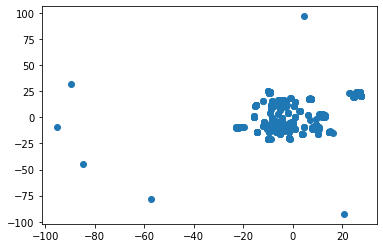

In [609]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

The t-SNE visual appears to point to about 3 different clusters, along with a few outliers.

In [610]:
df4 = pd.DataFrame(data=tsne_features)
df4

,0,1
0,-8.723432,11.446745
1,-5.496651,16.781940
2,-9.260367,23.082987
3,26.806017,23.221922
4,-14.310736,-13.716281
...,...,...
527,23.095570,23.393257
528,-3.134876,14.201263
529,-22.154995,-10.100702
530,-9.898273,-20.467749


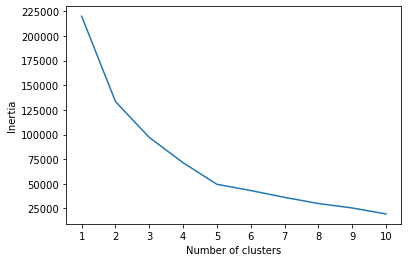

In [611]:
# K Means Clustering
# Find optimal k value using elbow curve
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df4)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Judging by the above plot, it seems that k = 5 is the best choice, since this is the clearest "elbow" fo the curve.

In [614]:
model = KMeans(n_clusters=5, random_state=5)
model.fit(df4)
predictions = model.predict(df4)


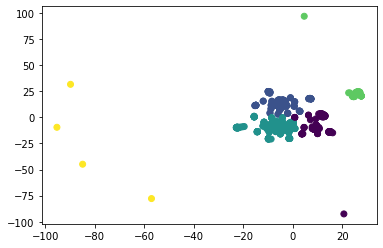

In [615]:
plt.scatter(x=df4[0], y=df4[1],c=predictions)
plt.show()

Based on these findings, I would recommend that YES, we can use clustering to classify different cryptocurrencies into overarching categories, although there seem to be outliers that don't fully fit into the main categories. I think 5 clusters is the optimal number: 4 main ones and the 5th to act as a sort of catch all.